In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [88]:
df_index = pd.read_csv("economic_index.csv")

In [89]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [90]:
#drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [91]:
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [92]:
## Check Null Values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

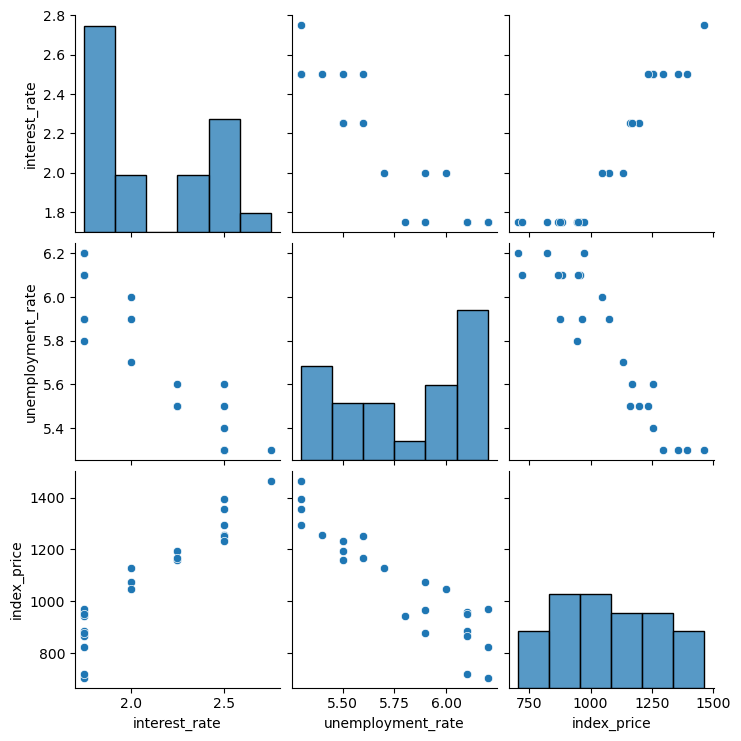

In [93]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [94]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


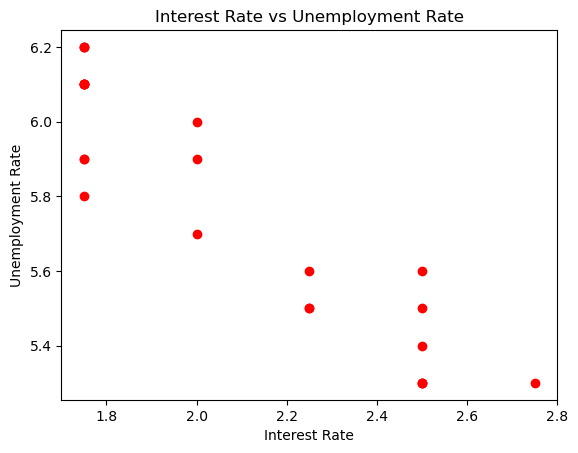

In [95]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='Red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show()

In [96]:
##Independent and Dependent features
##X = df_index['interest_rate','unemployment_rate']
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]


In [97]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [98]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
import seaborn as sns

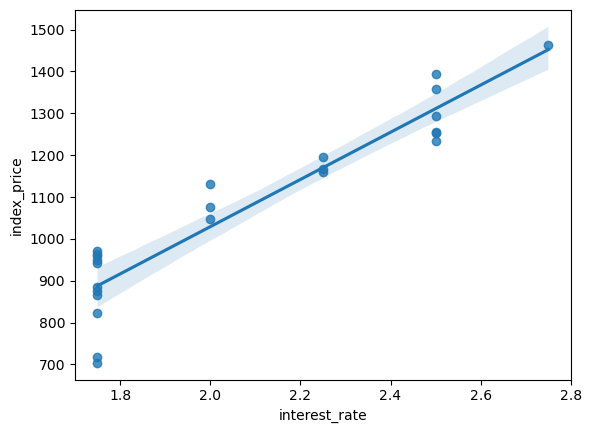

In [100]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

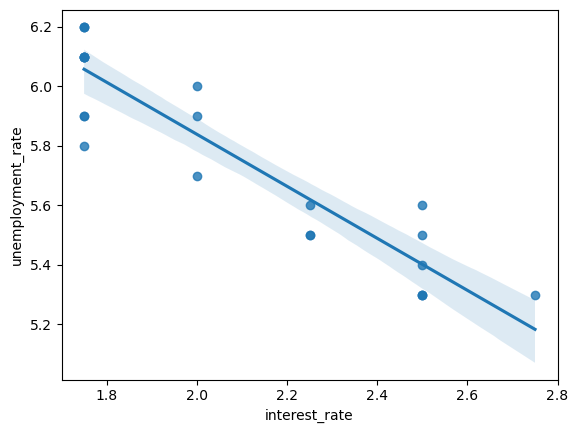

In [101]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()


In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [104]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [105]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [106]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', 
                                   cv=3)

In [107]:
np.mean(validation_score)

-5914.828180162388

In [108]:
## Prediction
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [109]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [110]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rsme = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rsme)

Mean Squared Error: 8108.567426306604
Mean Absolute Error: 73.80444932337097
Root Mean Squared Error: 90.04758423359621


In [111]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R^2 Score:", score)

R^2 Score: 0.7591371539010257


In [112]:
#Display adjusted R squared
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.5985619231683761

### Assumptions

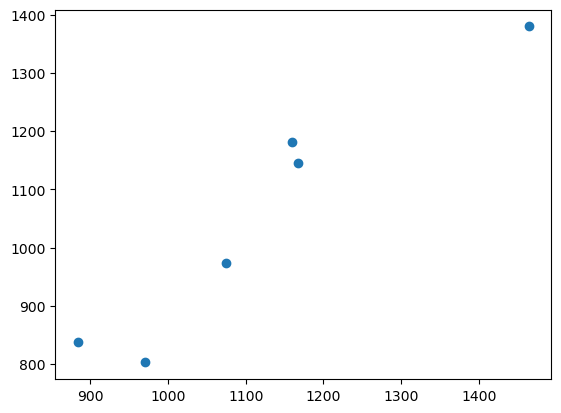

In [113]:
plt.scatter(y_test, y_pred)
plt.show()

In [114]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


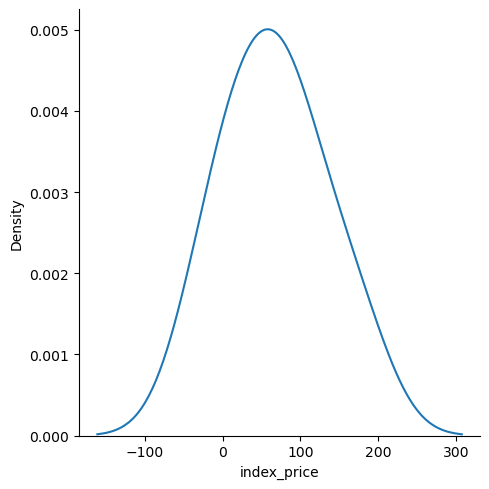

In [117]:
##Plot this residuals
sns.displot(residuals, kind='kde')
plt.show()

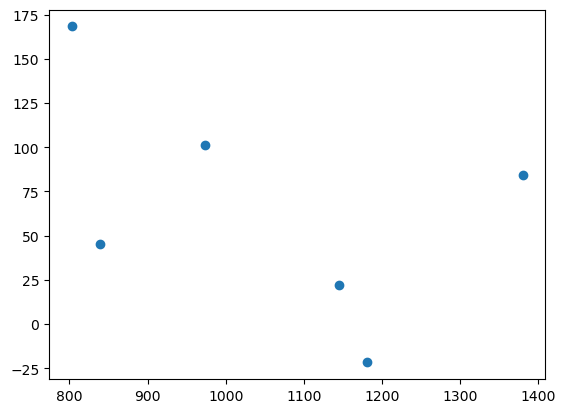

In [118]:
## Catter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.show()

In [119]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()  # Add constant for intercept

In [120]:
model.summary()

c:\Users\raisr\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                       0.754
Time:                        18:52:31   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
print(regression.coef_)

[  88.27275507 -116.25716066]
